In [232]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error,mean_absolute_error
from sklearn.model_selection  import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [233]:
data = pd.read_csv("salary.csv")

In [234]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [235]:
data.max()

rank               Prof
discipline            B
yrs.since.phd        56
yrs.service          60
sex                Male
salary           231545
dtype: object

In [236]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [237]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [238]:
data.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

<AxesSubplot:xlabel='rank', ylabel='salary'>

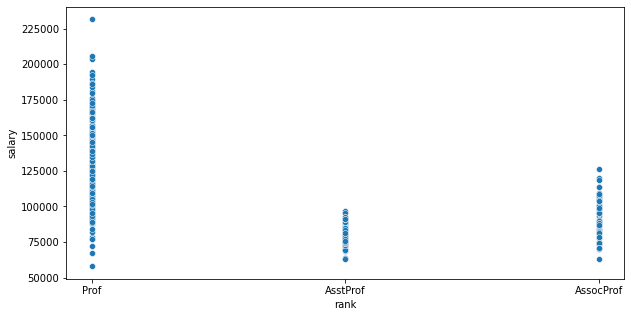

In [239]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "rank" , y = "salary" , data = data)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

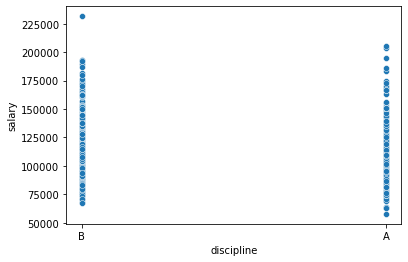

In [240]:
sns.scatterplot(x = 'discipline', y = "salary" , data = data)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

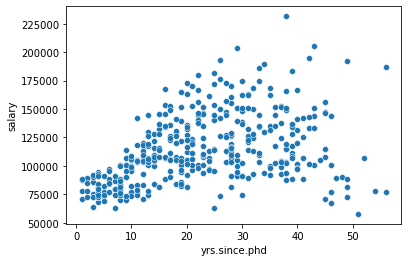

In [241]:
sns.scatterplot(x = 'yrs.since.phd', y = "salary" , data = data)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

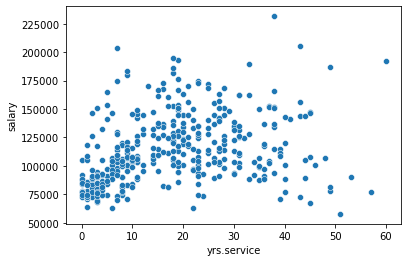

In [242]:
sns.scatterplot(x = 'yrs.service', y = "salary" , data = data)

<AxesSubplot:xlabel='sex', ylabel='salary'>

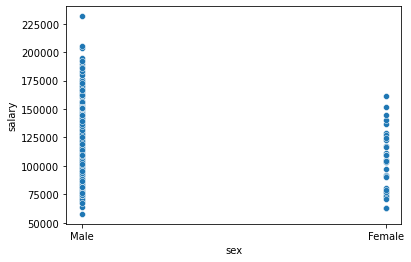

In [243]:
sns.scatterplot(x = 'sex', y = "salary" , data = data)

In [244]:
cor = data.corr()

In [245]:
cor

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [246]:
cor["salary"].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

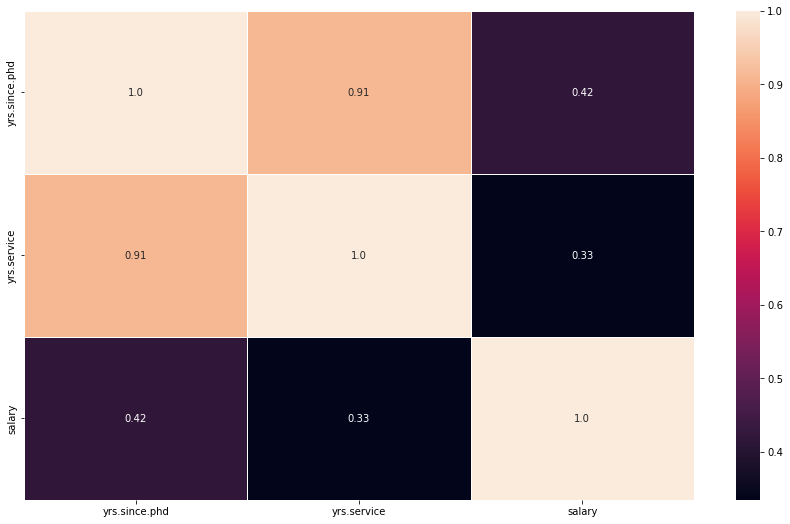

In [247]:
plt.figure(figsize =  (15,9))
sns.heatmap(cor,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.2')

In [248]:
des = data.describe()

In [249]:
des

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [251]:
data.drop(["rank","discipline","sex"], axis = 1 , inplace = True)

In [252]:
data

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


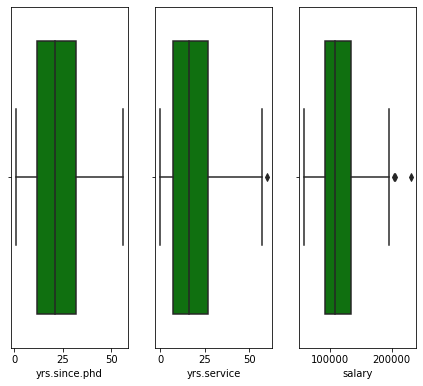

In [253]:
column = data.columns.values
ncol = 12
nrows = 158
plt.figure(figsize = (2*ncol,70*ncol))
for i in range ( 0 ,len(column)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[column[i]],color ="green",orient = "h")    
    plt.tight_layout()

In [254]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

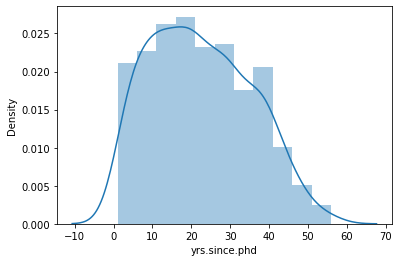

In [255]:
sns.distplot (data["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

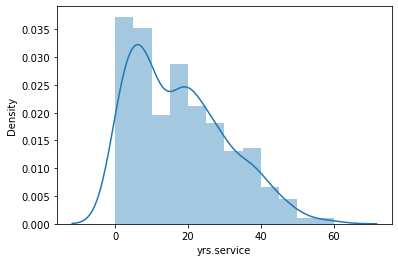

In [256]:
sns.distplot (data["yrs.service"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

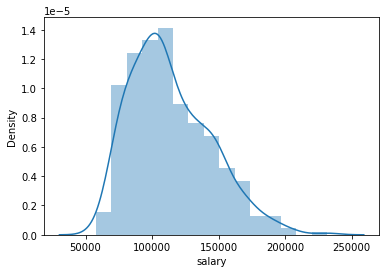

In [257]:
sns.distplot (data["salary"])

In [258]:
data.corr()["salary"]

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

In [259]:
from scipy.stats import zscore

In [260]:
import numpy as np


In [261]:
z = np.abs(zscore(data))

In [262]:
z.shape

(397, 3)

In [263]:
threshold = 2
print(np.where(z>2))

(array([  6,   7,  43,  71,  77, 125, 125, 131, 131, 161, 169, 190, 194,
       198, 249, 261, 268, 271, 276, 276, 279, 282, 282, 285, 285, 290,
       292, 298, 304, 317, 330, 330, 330, 350, 350, 350, 356, 364, 383,
       389], dtype=int64), array([2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2], dtype=int64))


In [264]:
z.iloc[43]

yrs.since.phd    1.218664
yrs.service      1.569358
salary           3.895377
Name: 43, dtype: float64

In [265]:
df = data[(z<2).all(axis = 1)]
print("new data shape : ", df.shape)


new data shape :  (366, 3)


In [272]:
d = pd.DataFrame(df)

In [273]:
d.skew()

0   -0.148384
1   -0.152336
2   -0.002971
dtype: float64

In [274]:
d

,0,1,2
0,-0.022477,0.354072,1.079039
1,0.060801,0.197605,1.998037
2,-1.593221,-1.254076,-1.281782
3,1.804731,1.633482,0.251930
4,1.493538,1.733516,1.132091
...,...,...,...
361,1.031859,1.145648,-0.208165
362,0.893351,0.428953,1.397224
363,1.619688,0.840663,-0.264300
364,0.456114,0.115612,-0.537274


In [275]:
x = d.iloc[:,:-1]

In [276]:
x

,0,1
0,-0.022477,0.354072
1,0.060801,0.197605
2,-1.593221,-1.254076
3,1.804731,1.633482
4,1.493538,1.733516
...,...,...
361,1.031859,1.145648
362,0.893351,0.428953
363,1.619688,0.840663
364,0.456114,0.115612


In [277]:
y = d.iloc[:,-1]

In [278]:
y

0      1.079039
1      1.998037
2     -1.281782
3      0.251930
4      1.132091
         ...   
361   -0.208165
362    1.397224
363   -0.264300
364   -0.537274
365   -1.215332
Name: 2, Length: 366, dtype: float64

In [269]:
df =  power_transform(df,method = 'yeo-johnson')

In [147]:
from sklearn.preprocessing import  power_transform
x =  power_transform(x,method = 'yeo-johnson')

In [148]:
x

array([[-0.02247658,  0.35407239],
       [ 0.06080119,  0.1976052 ],
       [-1.59322145, -1.25407592],
       [ 1.80473087,  1.63348163],
       [ 1.49353751,  1.73351561],
       [-1.32447652, -0.80267646],
       [ 0.14255613,  0.50182728],
       [-0.10738395,  0.35407239],
       [-0.65912955, -0.55922072],
       [-1.20149218, -1.44489806],
       [-2.09752504, -1.67461378],
       [-1.90868763, -1.98097289],
       [ 0.06080119,  0.35407239],
       [-0.65912955, -1.25407592],
       [-0.02247658,  0.50182728],
       [ 1.36497974,  1.37083992],
       [ 1.29974469,  0.70978553],
       [ 1.42956993,  1.47819609],
       [ 0.89335058,  0.90405329],
       [ 1.23384111,  1.20335886],
       [ 1.09992584,  1.14564842],
       [ 0.37958881,  0.42895317],
       [-0.56121667, -0.55922072],
       [ 0.14255613, -0.55922072],
       [ 1.16724379,  0.70978553],
       [-1.45448835, -1.25407592],
       [-0.76000762, -1.98097289],
       [-0.65912955, -0.55922072],
       [ 0.06080119,

In [279]:
pd.DataFrame(x).skew()

0   -0.148384
1   -0.152336
dtype: float64

In [280]:
from sklearn.linear_model import LinearRegression

In [281]:
from sklearn.model_selection import  train_test_split

In [282]:
from sklearn.metrics  import    mean_absolute_error,mean_squared_error

In [283]:
from sklearn.metrics import r2_score


In [284]:
ln = LinearRegression()
ln

LinearRegression()

In [285]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .20)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    if   round(r2_score(y_train, pred_train)*100,1) == round (r2_score(y_test, pred_test)*100,1):
        print("at random state",i,"model preforms best")
        print("at random_state =  " ,i)
        print("training accuracy score is " ,r2_score(y_train, pred_train)*100)
        print(" testing accuracy  score is " , r2_score(y_test, pred_test)*100,"\n")


at random state 65 model preforms best
at random_state =   65
training accuracy score is  29.78698948383267
 testing accuracy  score is  29.84105066670567 

at random state 72 model preforms best
at random_state =   72
training accuracy score is  30.131665339230985
 testing accuracy  score is  30.129484681930542 

at random state 155 model preforms best
at random_state =   155
training accuracy score is  30.29694288042378
 testing accuracy  score is  30.298088172114912 

at random state 252 model preforms best
at random_state =   252
training accuracy score is  29.90627691400617
 testing accuracy  score is  29.870464640657545 

at random state 567 model preforms best
at random_state =   567
training accuracy score is  28.860701044787294
 testing accuracy  score is  28.89417397221832 



In [286]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state = 42,test_size = .20)

In [287]:
print ("error :")
print("mean absolute error ", mean_absolute_error(y_test,pred_test))
print("mean squared error ", mean_squared_error(y_test,pred_test))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred_test)))

error :
mean absolute error  0.9305786018113459
mean squared error  1.2960705585791836
Root mean squared error 1.138450946935872


In [288]:
ln.score(x_train,y_train)

0.2862681699373175

In [289]:
ln.fit(x_train,y_train)

LinearRegression()

In [290]:
ln.score(x_train,y_train)

0.2902012195879614

In [291]:
ln.intercept_

0.002812671071037477

In [292]:
predict = ln.predict(x_test)

In [293]:
predict


array([-0.25834596, -0.91749733,  0.76182794,  0.55273605, -0.44834569,
        0.08710656, -0.02095193,  0.2698171 , -0.08199505, -0.95021859,
        0.64617064,  0.25783687, -0.07261945, -0.38783782,  0.41638038,
        0.13046561,  0.0710546 , -0.1156075 , -0.22050678, -0.37605822,
       -0.71636555, -0.23537924, -0.33214435, -0.22966332,  0.50104436,
        0.04212019,  0.55991857, -0.31795467, -0.37605822,  0.39919861,
       -0.76167466,  0.77386463,  0.18302856, -0.56794034, -0.71636555,
       -0.76167466,  0.04690903, -0.30831501, -0.899101  , -0.20827729,
       -0.34168138,  0.42804016, -0.2845883 ,  0.15695077, -0.64645802,
        0.43537195, -0.96477426, -0.63553662, -0.62060461,  0.3384557 ,
       -0.1156075 ,  0.47701653,  0.52742465,  0.82919991,  0.60003458,
       -0.65066791,  0.28981671,  0.96798633,  0.37517078,  0.18634122,
        0.84014043,  0.18302856, -0.75827568, -1.07095563, -0.5387715 ,
       -0.95021859,  0.3384557 , -0.35233151, -0.14578108, -0.95

In [294]:
data_1 = y_test

193   -0.484161
33    -1.427494
15    -0.194162
310   -0.419174
57    -0.763850
         ...   
82    -0.852860
94    -0.064445
192    1.789551
307    1.239226
211    0.758226
Name: 2, Length: 74, dtype: float64